In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
import tqdm
import seaborn as sns

In [2]:
old_root = Path('/ihme/covid-19/seir-pipeline-outputs/forecast/2020_08_04.03/')
new_root = Path('/ihme/covid-19/seir-forecast/latest/worse/')
old_scale_path = old_root / 'beta_scaling'
new_scale_path = new_root / 'beta_scaling'
old_comp_path = old_root / 'component_draws'
new_comp_path = new_root / 'component_draws'

In [3]:
def load_loc_draw_files(root: Path) -> pd.DataFrame:
    loc_dirs = list(root.iterdir())
    with multiprocessing.Pool(30) as pool:
        data = list(tqdm.tqdm(pool.imap(load_draw_files, loc_dirs), total=len(loc_dirs)))
    for loc_dir, df in zip(loc_dirs, data):
        df['location_id'] = int(loc_dir.name)
    
    return pd.concat(data)

def load_loc_files(root: Path) -> pd.DataFrame:
    data = []
    for loc_file in root.iterdir():
        df = pd.read_csv(loc_file)
        data.append(df)
        df['location_id'] = int(loc_file.stem.split('_')[0])
    return pd.concat(data)

def load_draw_files(root: Path, loc_id: int = None):
    data = []
    for draw_file in root.iterdir():
        df = pd.read_csv(draw_file)
        if loc_id is not None:
            df = df[df.location_id == loc_id]
        df['draw'] = int(draw_file.stem.split('_')[-1])
        data.append(df)
    return pd.concat(data)

def make_hist(old, new, bins=500):
    n_cols = len(old.columns)
    fig, ax = plt.subplots(nrows=n_cols, figsize=(7, 30))
    for i, col in enumerate(old.columns):
        ax[i].hist(((old[col] - new[col])/old[col]).fillna(0), bins=bins)
        ax[i].set_title(col)
    plt.show()

In [4]:
%%time
old_scaling = load_loc_files(old_scale_path).set_index(['location_id', 'draw']).sort_index()
old_scaling['scale_init'] = old_scaling['fit_final'] / old_scaling['pred_start']
old_scaling = old_scaling.rename(columns={'offset': 'log_beta_residual_mean_offset', 
                                          'beta_ratio_mean': 'scale_final',
                                          'beta_residual_mean': 'log_beta_residual_mean'})
new_scaling = load_draw_files(new_scale_path).set_index(['location_id', 'draw']).sort_index()
new_scaling = new_scaling.drop(columns='deaths')
new_scaling = new_scaling[old_scaling.columns]
#new_scaling = new_scaling[old_scaling.columns].loc[old_scaling.index]

CPU times: user 4.3 s, sys: 536 ms, total: 4.83 s
Wall time: 6.9 s


In [43]:
old_scaling.loc[4853]

,window_size,history_days_end,history_days_start,fit_final,pred_start,scale_final,log_beta_residual_mean_offset,log_beta_residual_mean,scale_init
draw,,,,,,,,,
0,42,27,5,0.345491,0.492559,0.815256,0.007962,-0.204253,0.701421
1,42,24,6,0.316628,0.321247,0.983848,0.007962,-0.016284,0.985621
2,42,23,1,0.323137,0.298269,0.933543,0.007962,-0.068768,1.083374
3,42,34,3,0.324619,0.339704,0.697757,0.007962,-0.359884,0.955594
4,42,24,3,0.300842,0.355499,0.675829,0.007962,-0.391815,0.846254
...,...,...,...,...,...,...,...,...,...
995,42,39,2,0.306318,0.269681,1.322422,0.007962,0.279465,1.135853
996,42,38,2,0.419417,0.748636,1.056077,0.007962,0.054562,0.560241
997,42,18,5,0.459350,0.731303,0.842448,0.007962,-0.171444,0.628126


In [44]:
new_scaling.loc[4853]

,window_size,history_days_end,history_days_start,fit_final,pred_start,scale_final,log_beta_residual_mean_offset,log_beta_residual_mean,scale_init
draw,,,,,,,,,
0,42,27,5,0.345491,0.492467,0.815128,0.008311,-0.204410,0.701552
1,42,24,6,0.316628,0.321247,0.983504,0.008311,-0.016633,0.985621
2,42,23,1,0.323137,0.298279,0.933185,0.008311,-0.069152,1.083337
3,42,34,3,0.324619,0.339448,0.698022,0.008311,-0.359505,0.956315
4,42,24,3,0.300842,0.355499,0.675572,0.008311,-0.392196,0.846253
...,...,...,...,...,...,...,...,...,...
995,42,39,2,0.306318,0.269650,1.322086,0.008311,0.279210,1.135984
996,42,38,2,0.419417,0.749736,1.054152,0.008311,0.052736,0.559419
997,42,18,5,0.459350,0.732092,0.841236,0.008311,-0.172883,0.627449


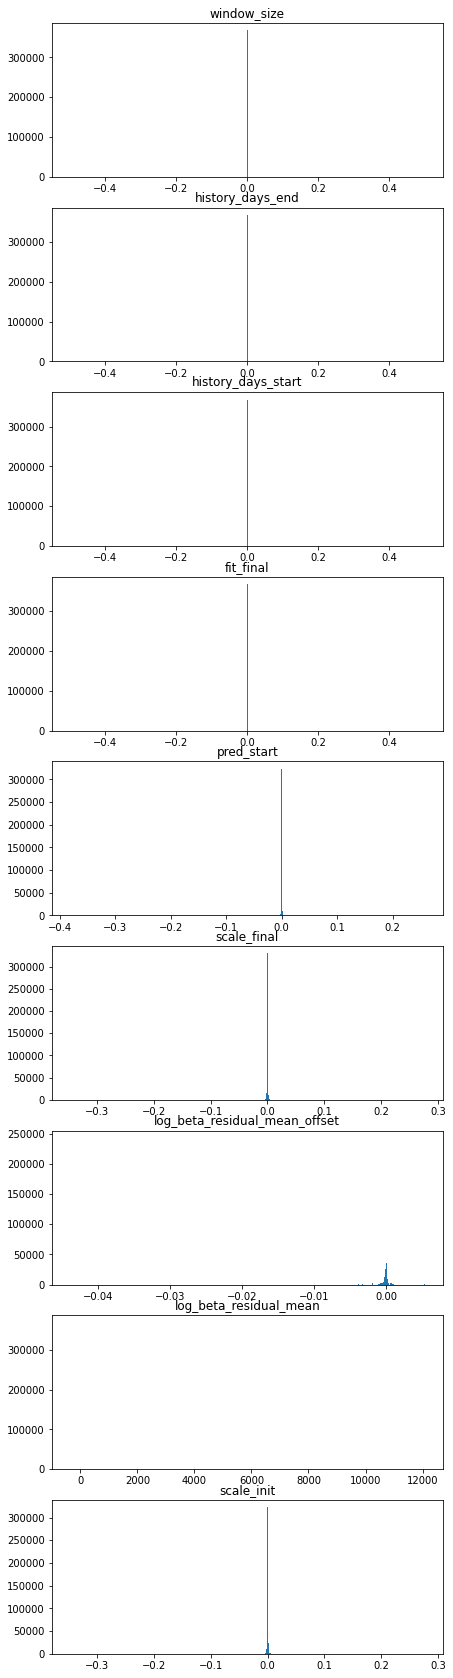

In [8]:
make_hist(old_scaling, new_scaling)

In [9]:
%%time
old_comp = load_loc_draw_files(old_comp_path).set_index(['location_id', 'draw', 'date']).sort_index()
new_comp = load_draw_files(new_comp_path)
#new_comp = new_comp[~new_comp.location_id.isin([60896])].set_index(['location_id', 'draw', 'date']).sort_index()
#old_comp = old_comp[new_comp.columns]


  0%|          | 0/368 [00:28<?, ?it/s]Process ForkPoolWorker-18:
Process ForkPoolWorker-24:
Process ForkPoolWorker-27:
Process ForkPoolWorker-30:



KeyboardInterrupt: 

In [ ]:
make_hist(old_comp, new_comp)

In [38]:
old = load_draw_files(old_comp_path / '4853')

In [39]:
new = load_draw_files(new_comp_path, 4853)

In [40]:
old['date'] = pd.to_datetime(old['date'])
new['date'] = pd.to_datetime(new['date'])
b_old = old.set_index(['date', 'draw']).sort_index().beta.rename('old')
b_new = new.set_index(['date', 'draw']).sort_index().beta.rename('new')
b_new = b_new[b_new.notnull()]
b_old = b_old.unstack()
b_new = b_new.unstack()
shared_idx = b_old.index.intersection(b_new.index)
b_old = b_old.loc[shared_idx]
b_new = b_new.loc[shared_idx]
b_old = pd.concat({'old': b_old}, names=['type']).stack().rename('value')
b_new = pd.concat({'new': b_new}, names=['type']).stack().rename('value')
b = b_old.append(b_new).reset_index()

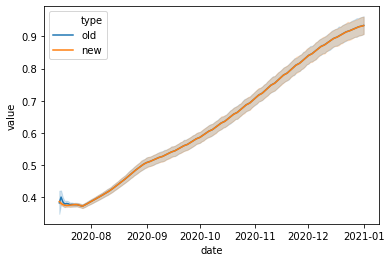

In [41]:
sns.lineplot(x='date', y='value', hue='type', data=b)

In [ ]:
b_new


In [ ]:
pd.merge(b_new, b_old, left_index=True, right_index=True, how='left')

In [8]:
df_old = pd.read_csv('/ihme/covid-19/hospitalizations/inputs/seir/2020_08_26.19/stats/Cumulative_deaths_summary_2020_08_26.19.csv')
df_old['date'] = pd.to_datetime(df_old['date'])
deaths_old = df_old[df_old.date == pd.Timestamp('2020-12-31')].groupby(['location_id', 'location']).deaths_mean.max().rename('old').reset_index()
deaths_old

,location_id,location,old
0,8,Taiwan (Province of China),9.189085
1,11,Indonesia,15225.365430
2,13,Malaysia,123.481237
3,14,Maldives,211.004175
4,15,Myanmar,7.125888
...,...,...,...
371,60390,Saxony,3394.037384
372,60391,Schleswig-Holstein,736.775690
373,60392,Thuringia,1365.046541
374,60886,King and Snohomish Counties,7534.136893


In [9]:
df_new = pd.read_csv('/ihme/covid-19/seir-forecast/2020_08_27.01/worse/output_summaries/cumulative_deaths.csv')
df_new['date'] = pd.to_datetime(df_new['date'])
deaths_new = df_new[df_new.date == pd.Timestamp('2020-12-31')].groupby(['location_id'])['mean'].max().rename('new').reset_index()
deaths_new

,location_id,new
0,8,9.200307
1,11,15183.202646
2,13,123.410018
3,14,211.751956
4,15,7.127794
...,...,...
371,60390,3445.582488
372,60391,730.721629
373,60392,1411.313187
374,60886,7586.538110


Text(0.5, 1.0, 'Cumulative deaths 12/31')

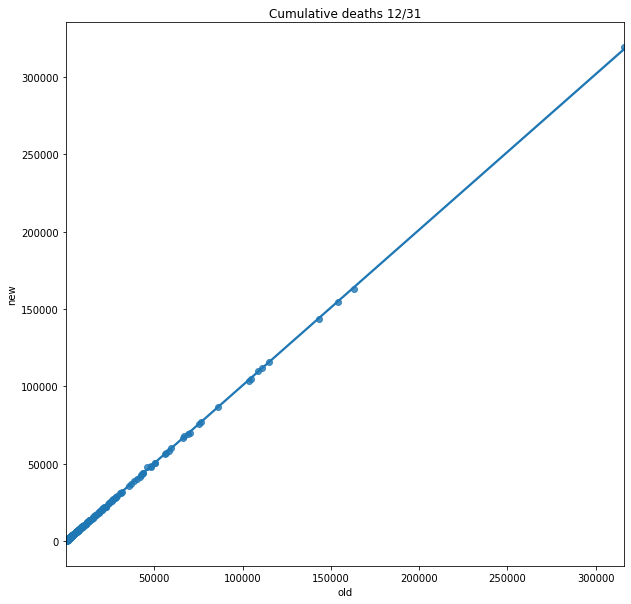

In [10]:
both = deaths_old.merge(deaths_new, on='location_id')

plt.figure(figsize=(10, 10))
sns.regplot(x='old', y='new', data=both)
plt.title('Cumulative deaths 12/31')

In [11]:
both['err'] = (both['old'] - both['new']) / both['old']

In [12]:
both.to_csv('/ihme/homes/collijk/compare_deaths.csv')

In [13]:
both.sort_values('err')

,location_id,location,old,new,err
60,99,Uruguay,50.165804,79.448972,-0.583728
54,90,Norway,273.495593,324.750620,-0.187407
88,144,Jordan,485.465350,532.516576,-0.096920
369,60388,Saarland,1211.596011,1288.317515,-0.063323
368,60387,Rhineland-Palatinate,2878.025414,3038.003332,-0.055586
...,...,...,...,...,...
137,208,Guinea,1310.078528,1292.557329,0.013374
155,435,South Sudan,46.602298,45.938483,0.014244
19,47,Czechia,4012.561004,3949.026686,0.015834
358,60377,Baden-Württemberg,7480.081130,7313.661071,0.022248


In [14]:
old_stacked = (df_old
               .rename(columns={'deaths_mean': 'old_mean', 
                                'deaths_upper': 'old_upper', 
                                'deaths_lower': 'old_lower'})
               .set_index(['location', 'location_id', 'date'])
               .drop(columns='observed')
               .stack()
               .rename('value'))
old_stacked.index.names = ['location', 'location_id', 'date', 'measure']
old_stacked = old_stacked.reset_index()
old_stacked['type'] = 'old'
old_stacked = old_stacked.set_index(['location_id', 'date'])
loc_map = old_stacked.reset_index(level='date', drop=True).location.drop_duplicates()
old_stacked

location    measure         value  \
location_id date                                                              
8           2019-12-12  Taiwan (Province of China)   old_mean  0.000000e+00   
            2019-12-12  Taiwan (Province of China)  old_lower  0.000000e+00   
            2019-12-12  Taiwan (Province of China)  old_upper  0.000000e+00   
            2019-12-13  Taiwan (Province of China)   old_mean  0.000000e+00   
            2019-12-13  Taiwan (Province of China)  old_lower  0.000000e+00   
...                                            ...        ...           ...   
1           2021-12-30                         NaN  old_lower  7.956074e+06   
            2021-12-30                         NaN  old_upper  1.354809e+07   
            2021-12-31                         NaN   old_mean  1.076186e+07   
            2021-12-31                         NaN  old_lower  7.957087e+06   
            2021-12-31                         NaN  old_upper  1.354835e+07   

                       type  
location_id date             
8           2019-12-12  old  
            2019-12-12  old  
            2019-12-12  old  
            2019-12-13  old  
            2019-12-13  old  
...                     ...  
1           2021-12-30  old  
            2021-12-30  old  
            2021-12-31  old  
            2021-12-31  old  
            2021-12-31  old  

[939501 rows x 4 columns]

In [15]:
new_stacked = (df_new
               .rename(columns={'mean': 'new_mean', 
                                'upper': 'new_upper', 
                                'lower': 'new_lower'})
               .set_index(['location_id', 'date'])
               .stack()
               .rename('value'))
new_stacked.index.names = ['location_id', 'date', 'measure']
new_stacked = new_stacked.reset_index()
new_stacked['type'] = 'new'
new_stacked = new_stacked.set_index(['location_id', 'date'])
new_stacked

measure         value type
location_id date                                    
8           2019-12-12   new_mean      0.000000  new
            2019-12-12  new_upper      0.000000  new
            2019-12-12  new_lower      0.000000  new
            2019-12-13   new_mean      0.000000  new
            2019-12-13  new_upper      0.000000  new
...                           ...           ...  ...
60887       2021-12-30  new_upper  20884.254587  new
            2021-12-30  new_lower   8384.893003  new
            2021-12-31   new_mean  14682.290077  new
            2021-12-31  new_upper  20884.295867  new
            2021-12-31  new_lower   8386.291874  new

[847128 rows x 3 columns]

In [16]:
shared_idx = old_stacked.index.intersection(new_stacked.index)
stacked = old_stacked.loc[shared_idx].append(new_stacked.loc[shared_idx])
stacked = stacked.sort_index().reset_index()
stacked = stacked.set_index('location_id')

loc_map = loc_map[loc_map.notnull()].to_dict()

In [17]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('/homes/collijk/cumulative_deaths_compare.pdf') as pdf:
    for loc_id, loc_name in tqdm.tqdm(loc_map.items()):
        plt.figure(figsize=(10, 8))
        sns.lineplot(x='date', y='value', hue='type', data=stacked.loc[loc_id])
        plt.ylabel('cumulative deaths')
        plt.title(loc_name)
        pdf.savefig()
        plt.close()

100%|██████████| 374/374 [2:25:09<00:00, 23.29s/it]  


{11: 'Indonesia',
 13: 'Malaysia',
 14: 'Maldives',
 15: 'Myanmar',
 16: 'Philippines',
 17: 'Sri Lanka',
 18: 'Thailand',
 33: 'Armenia',
 34: 'Azerbaijan',
 35: 'Georgia',
 36: 'Kazakhstan',
 37: 'Kyrgyzstan',
 39: 'Tajikistan',
 41: 'Uzbekistan',
 43: 'Albania',
 44: 'Bosnia and Herzegovina',
 45: 'Bulgaria',
 46: 'Croatia',
 47: 'Czechia',
 48: 'Hungary',
 49: 'North Macedonia',
 50: 'Montenegro',
 51: 'Poland',
 52: 'Romania',
 53: 'Serbia',
 54: 'Slovakia',
 55: 'Slovenia',
 57: 'Belarus',
 58: 'Estonia',
 59: 'Latvia',
 60: 'Lithuania',
 61: 'Republic of Moldova',
 62: 'Russian Federation',
 63: 'Ukraine',
 67: 'Japan',
 68: 'Republic of Korea',
 69: 'Singapore',
 71: 'Australia',
 72: 'New Zealand',
 74: 'Andorra',
 75: 'Austria',
 76: 'Belgium',
 77: 'Cyprus',
 78: 'Denmark',
 79: 'Finland',
 80: 'France',
 82: 'Greece',
 83: 'Iceland',
 84: 'Ireland',
 85: 'Israel',
 87: 'Luxembourg',
 88: 'Malta',
 89: 'Netherlands',
 90: 'Norway',
 91: 'Portugal',
 93: 'Sweden',
 94: 'Switz